In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Data Source (sales_transactions).csv')
data.head()

,TransactionID,CustomerID,TransactionDate,ProductID,ProductCategory,Quantity,PricePerUnit,TotalAmount,TrustPointsUsed,PaymentMethod,DiscountApplied
0,1,1002.0,08-08-2024 22:00,2008,Grocery,1,10.0,10.0,20,Trust Points,5.0
1,2,NaN,07-08-2024 01:00,2004,Home Decor,1,10.0,10.0,0,Credit Card,20.0
2,3,1004.0,02-08-2024 19:00,2002,Grocery,3,30.0,90.0,0,Credit Card,25.0
3,2,1003.0,07-08-2024 17:00,2001,Toys,2,30.0,60.0,50,NaN,20.0
4,5,1001.0,09-08-2024 09:00,2008,Grocery,1,NaN,NaN,20,Trust Points,5.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    50 non-null     int64  
 1   CustomerID       45 non-null     float64
 2   TransactionDate  49 non-null     object 
 3   ProductID        50 non-null     int64  
 4   ProductCategory  50 non-null     object 
 5   Quantity         50 non-null     int64  
 6   PricePerUnit     36 non-null     float64
 7   TotalAmount      36 non-null     float64
 8   TrustPointsUsed  50 non-null     int64  
 9   PaymentMethod    40 non-null     object 
 10  DiscountApplied  45 non-null     float64
dtypes: float64(4), int64(4), object(3)
memory usage: 4.4+ KB


In [4]:
data.describe()

,TransactionID,CustomerID,ProductID,Quantity,PricePerUnit,TotalAmount,TrustPointsUsed,DiscountApplied
count,50.000000,45.000000,50.000000,50.000000,36.000000,36.000000,50.000000,45.000000
mean,25.460000,1002.444444,2004.920000,1.420000,125.277778,155.277778,28.800000,23.888889
std,14.640188,1.306549,2.284285,1.263135,188.292874,351.596247,39.467889,13.853490
min,1.000000,1001.000000,2001.000000,-1.000000,10.000000,-500.000000,-10.000000,5.000000
25%,13.250000,1001.000000,2003.000000,1.000000,17.500000,10.000000,0.000000,15.000000
50%,25.500000,1002.000000,2005.000000,1.000000,30.000000,40.000000,20.000000,20.000000
75%,37.750000,1003.000000,2007.000000,2.000000,100.000000,150.000000,50.000000,30.000000
max,50.000000,1005.000000,2008.000000,5.000000,500.000000,1500.000000,100.000000,50.000000


In [8]:
# Convert TransactionDate to datetime format
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'], format="%d-%m-%Y %H:%M")

In [9]:
#To find the missing values
data.isnull().sum()

TransactionID       0
CustomerID          5
TransactionDate     1
ProductID           0
ProductCategory     0
Quantity            0
PricePerUnit       14
TotalAmount        14
TrustPointsUsed     0
PaymentMethod      10
DiscountApplied     5
dtype: int64

In [10]:
#Filling NaN values of CustomerID by Mode
data['CustomerID'].fillna(data['CustomerID'].mode()[0], inplace=True)

#Filling NaN values of TransactionDate by Forward fill method
data['TransactionDate'].fillna(method='ffill', inplace=True)

#Filling the NaN values of PricePerUnit by Mean of the product category
data['PricePerUnit'] = data.groupby('ProductCategory')['PricePerUnit'].transform(
    lambda x: x.fillna(x.mean()))

#Filling the NaN values of TotalAmount by multiplying Qunatity and PricePerUnit
data['TotalAmount']=data['TotalAmount'].fillna(data['Quantity']*data['PricePerUnit'])

#Filling NaN values of PayementMethod by Unknown
data['PaymentMethod'].fillna('unknown',inplace=True)

#Filling the NaN values of DiscountApplied by Mean of the product category
data['DiscountApplied'] = data.groupby('ProductCategory')['DiscountApplied'].transform(
    lambda x: x.fillna(x.mean()))

C:\Users\HP\AppData\Local\Temp\ipykernel_6348\2868366053.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['TransactionDate'].fillna(method='ffill', inplace=True)


In [11]:
#To find the missing values after filling nan values
data.isnull().sum()

TransactionID      0
CustomerID         0
TransactionDate    0
ProductID          0
ProductCategory    0
Quantity           0
PricePerUnit       0
TotalAmount        0
TrustPointsUsed    0
PaymentMethod      0
DiscountApplied    0
dtype: int64

In [12]:
# Check for duplicates
duplicates = data[data.duplicated()]

# To see the duplicated rows
print(duplicates)

Empty DataFrame
Columns: [TransactionID, CustomerID, TransactionDate, ProductID, ProductCategory, Quantity, PricePerUnit, TotalAmount, TrustPointsUsed, PaymentMethod, DiscountApplied]
Index: []


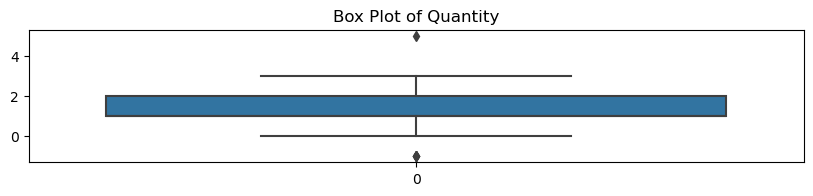

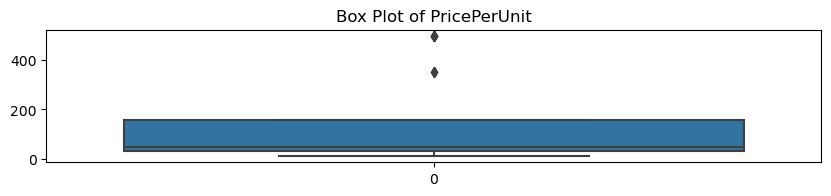

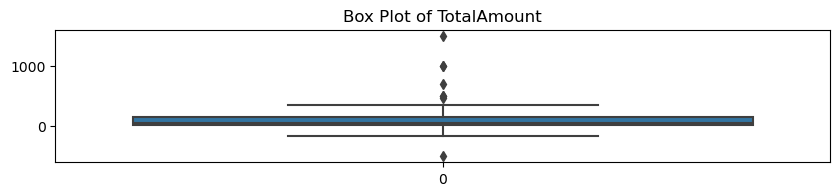

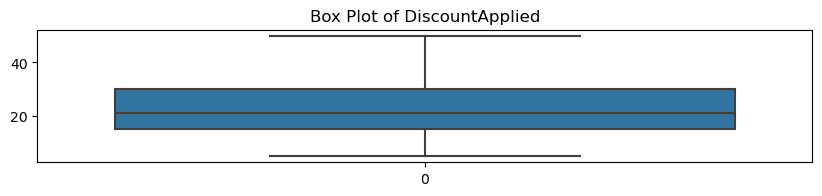

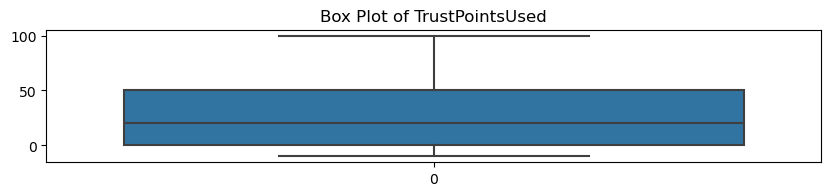

In [13]:
# Select the columns you want to create boxplots for
columns_to_plot = ['Quantity', 'PricePerUnit', 'TotalAmount', 'DiscountApplied', 'TrustPointsUsed']
for i,col in enumerate(columns_to_plot,1):
    plt.figure(figsize=(10,10))
    plt.subplot(len(columns_to_plot),1,i)
    sns.boxplot(data=data[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [14]:
# Handle incorrect or outlier values
data = data[data['Quantity'] > 0]
data = data[data['TotalAmount'] > 0]
data = data[data['TrustPointsUsed'] >= 0]

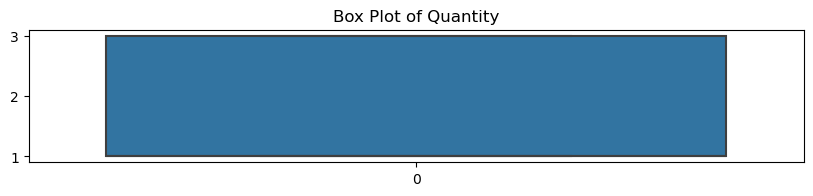

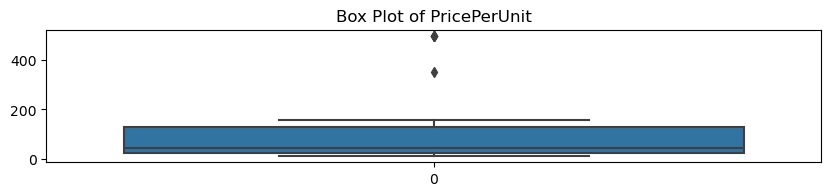

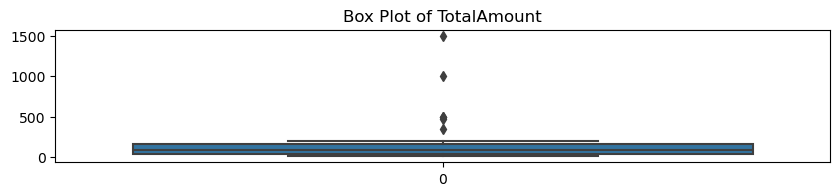

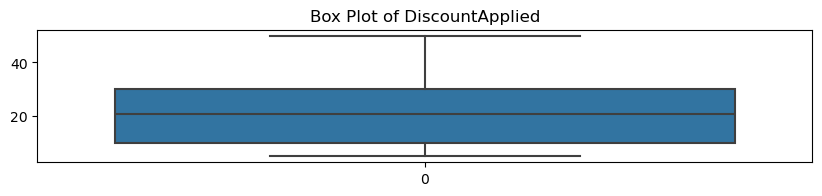

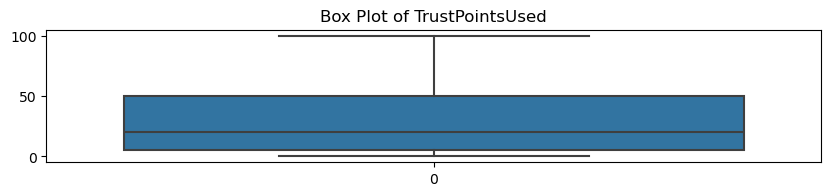

In [15]:
# Select the columns you want to create boxplots for
columns_to_plot = ['Quantity', 'PricePerUnit', 'TotalAmount', 'DiscountApplied', 'TrustPointsUsed']
for i,col in enumerate(columns_to_plot,1):
    plt.figure(figsize=(10,10))
    plt.subplot(len(columns_to_plot),1,i)
    sns.boxplot(data=data[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [16]:
#Checking for mean, median mode after preprocessing
data.describe()

,TransactionID,CustomerID,TransactionDate,ProductID,Quantity,PricePerUnit,TotalAmount,TrustPointsUsed,DiscountApplied
count,31.000000,31.000000,31,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,24.258065,1002.290323,2024-08-06 01:46:27.096774144,2004.838710,1.838710,116.028488,199.622958,38.387097,22.721774
min,1.000000,1001.000000,2024-08-01 04:00:00,2001.000000,1.000000,10.000000,10.000000,0.000000,5.000000
25%,15.000000,1001.000000,2024-08-02 19:30:00,2003.000000,1.000000,25.000000,35.000000,5.000000,10.000000
50%,25.000000,1002.000000,2024-08-06 15:00:00,2005.000000,1.000000,44.545455,90.000000,20.000000,20.833333
75%,32.500000,1003.000000,2024-08-09 03:00:00,2007.000000,3.000000,127.857143,156.038961,50.000000,30.000000
max,50.000000,1005.000000,2024-08-10 00:00:00,2008.000000,3.000000,500.000000,1500.000000,100.000000,50.000000
std,14.354947,1.216376,NaN,2.409658,0.934408,164.759537,320.278966,37.867909,13.922210


In [17]:
# Performing aggregation
aggregated_data = {
    'Total Quantity Sold': data['Quantity'].sum(),
    'Total Sales Revenue': data['TotalAmount'].sum(),
    'Average Price Per Unit': data['PricePerUnit'].mean(),
    'Total Discounts': data['DiscountApplied'].sum(),
    'Total Trust Points Used': data['TrustPointsUsed'].sum(),
    'Total Transaction Dates': data['TransactionDate'].dt.date.unique()
}
# Display results
print("Aggregated Data:")
print(aggregated_data)

Aggregated Data:
{'Total Quantity Sold': 57, 'Total Sales Revenue': 6188.311688311688, 'Average Price Per Unit': 116.02848764139087, 'Total Discounts': 704.3750000000001, 'Total Trust Points Used': 1190, 'Total Transaction Dates': array([datetime.date(2024, 8, 8), datetime.date(2024, 8, 7),
       datetime.date(2024, 8, 2), datetime.date(2024, 8, 9),
       datetime.date(2024, 8, 4), datetime.date(2024, 8, 5),
       datetime.date(2024, 8, 1), datetime.date(2024, 8, 10),
       datetime.date(2024, 8, 6), datetime.date(2024, 8, 3)], dtype=object)}


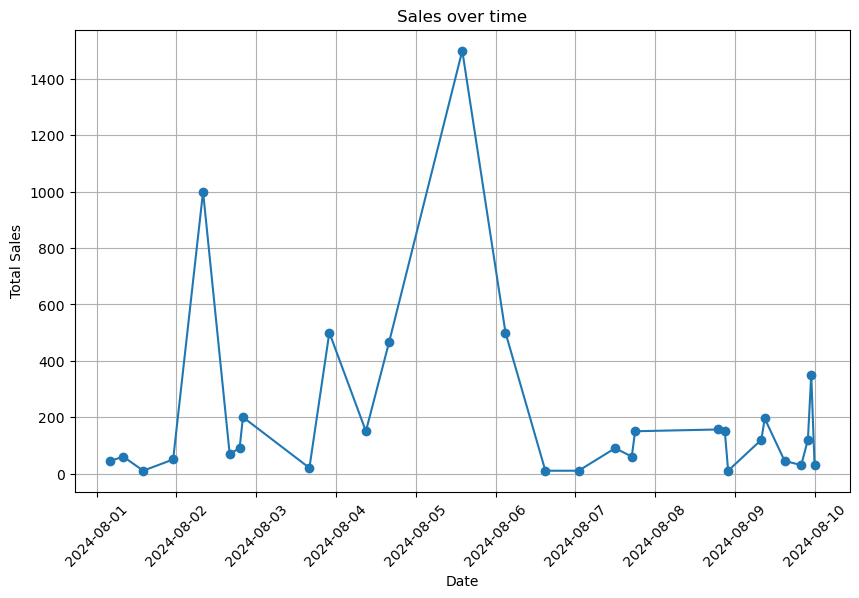

In [18]:
#Sales over Time
sales_over_time=data.groupby(data['TransactionDate'])['TotalAmount'].sum()
plt.figure(figsize=(10,6))
plt.plot(sales_over_time,marker='o')
plt.title('Sales over time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

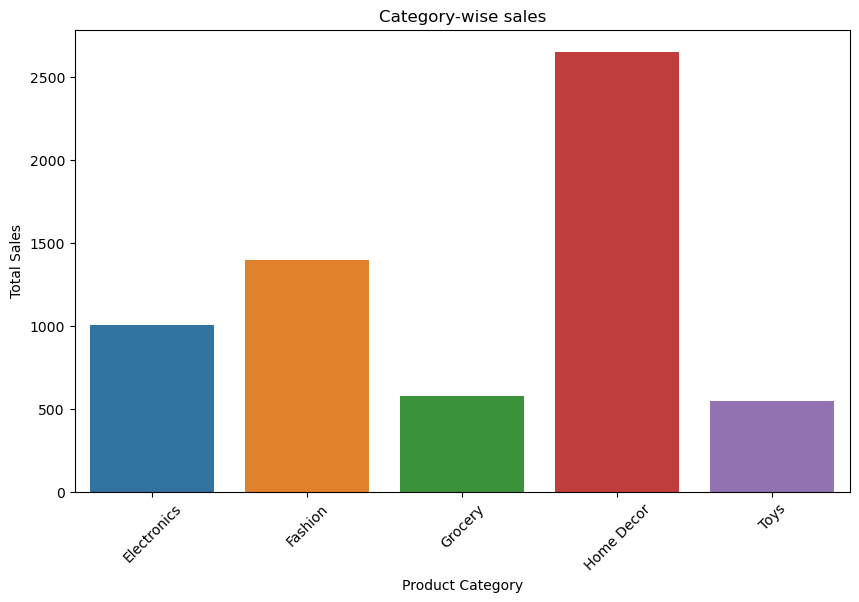

In [19]:
#Category wise sales 
category_sales=data.groupby('ProductCategory')['TotalAmount'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='ProductCategory',y='TotalAmount',data=category_sales)
plt.title('Category-wise sales')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

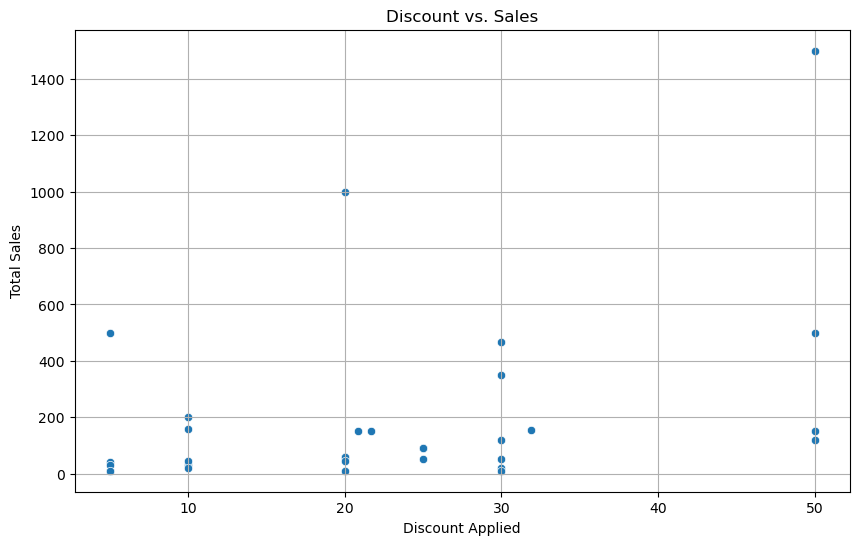

In [20]:
# Plot Discount vs. Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DiscountApplied', y='TotalAmount', data=data)
plt.title('Discount vs. Sales')
plt.xlabel('Discount Applied')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

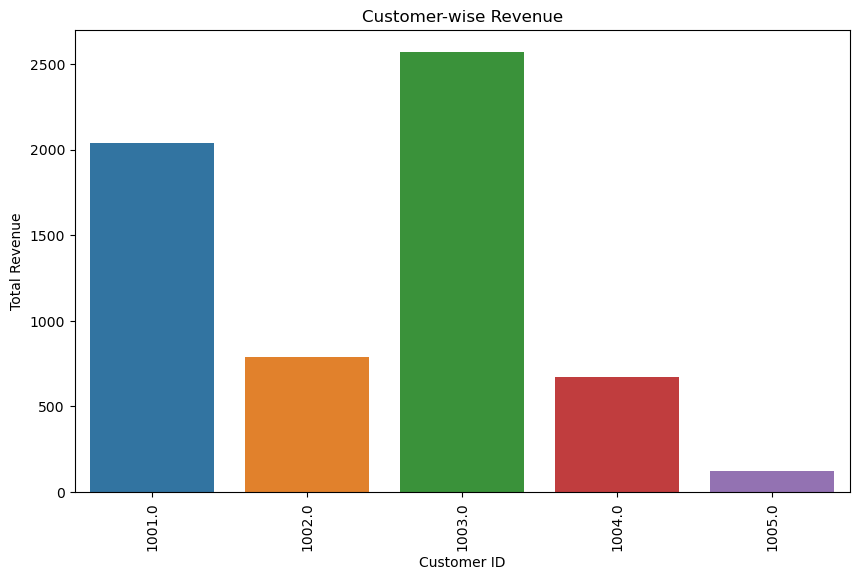

In [21]:
# Aggregate revenue by CustomerID
customer_revenue = data.groupby('CustomerID')['TotalAmount'].sum().reset_index()

# Plot customer-wise revenue
plt.figure(figsize=(10, 6))
sns.barplot(x='CustomerID', y='TotalAmount', data=customer_revenue)
plt.title('Customer-wise Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.show()

In [23]:
# Downloading Preprocessed dataset
output_file_path = 'C:/Users/HP/Desktop/yuma/sales_transactions.csv'
data.to_csv(output_file_path, index=False)